In [ ]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv.zip')
print(df.head())
print(df.info())
print(df.describe())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

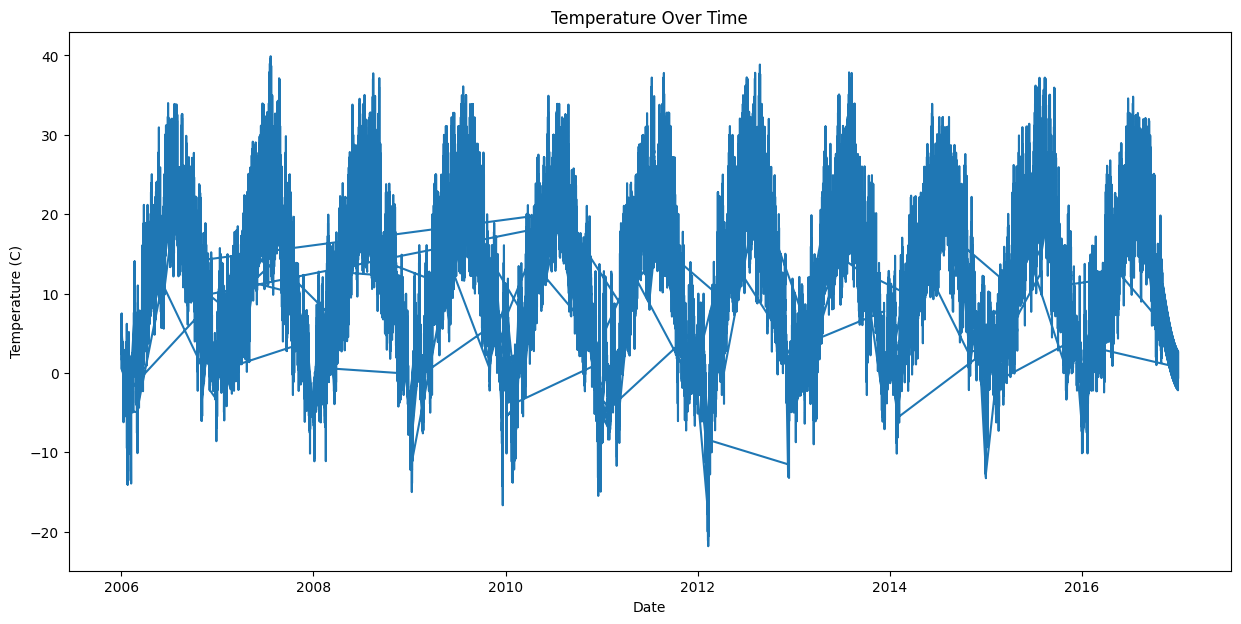

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df_plot = df.set_index('Formatted Date')
plt.figure(figsize=(15, 7))
plt.plot(df_plot['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

In [ ]:
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
df['month'] = df['Formatted Date'].dt.month
df['day_of_week'] = df['Formatted Date'].dt.dayofweek
df['hour'] = df['Formatted Date'].dt.hour

In [ ]:
df_processed = pd.get_dummies(df, columns=['Summary', 'Precip Type'], drop_first=True)

In [ ]:
y = df_processed['Temperature (C)']
X = df_processed.drop(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)', 'Daily Summary'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.7787245923545234
Mean Squared Error (MSE): 5.637759592623631
Root Mean Squared Error (RMSE): 2.3743966797112126
R-squared (R²): 0.9388259121829601


In [ ]:
new_data = pd.DataFrame({
    'Formatted Date': ['2025-09-27 15:00:00.000 +0200'],
    'Summary': ['Partly Cloudy'],
    'Precip Type': ['rain'],
    'Humidity': [0.75],
    'Wind Speed (km/h)': [15.0],
    'Wind Bearing (degrees)': [250.0],
    'Visibility (km)': [10.0],
    'Loud Cover': [0.0],
    'Pressure (millibars)': [1012.0],
    'Daily Summary': ['Partly cloudy throughout the day.']
})

In [ ]:
new_data['Formatted Date'] = pd.to_datetime(new_data['Formatted Date'], utc=True)
new_data['month'] = new_data['Formatted Date'].dt.month
new_data['day_of_week'] = new_data['Formatted Date'].dt.dayofweek
new_data['hour'] = new_data['Formatted Date'].dt.hour
new_data_processed = pd.get_dummies(new_data, columns=['Summary', 'Precip Type'])
training_columns = X_train.columns
new_data_aligned = new_data_processed.reindex(columns=training_columns, fill_value=0)

In [ ]:
predicted_temperature = model.predict(new_data_aligned)

print(f"The predicted temperature is: {predicted_temperature[0]:.2f} °C")

The predicted temperature is: 16.89 °C


In [ ]:
def preprocess_data(df, training_cols):
    """Preprocesses new data to be ready for prediction."""
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
    df['month'] = df['Formatted Date'].dt.month
    df['day_of_week'] = df['Formatted Date'].dt.dayofweek
    df['hour'] = df['Formatted Date'].dt.hour

    df_processed = pd.get_dummies(df, columns=['Summary', 'Precip Type'])
    df_aligned = df_processed.reindex(columns=training_cols, fill_value=0)

    return df_aligned

# --- Using the function ---
new_data_prepared = preprocess_data(new_data, X_train.columns)
prediction = model.predict(new_data_prepared)
print(f"Predicted Temperature (using function): {prediction[0]:.2f} °C")

Predicted Temperature (using function): 16.89 °C
